## 📊 Entrega Estadística 📊
### Santiago Torres Busquets
#### Master Big Data & Data Science - Universidad Complutense de Madrid

In [1]:
# Importación de librerías principales
# Tratamiento de datos
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style

# Otras librerias
import statistics as s
import statsmodels.api as sm
import math

# lectura del fichero excel que contienen las observaciones
df = pd.read_excel('eval_master.xlsx')

In [2]:
# Vista previa del dataframe
df.head()

,Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
0,1,90,159
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141


### Ejercicio 1

In [3]:
# Separo los grupos de control
grupo1 = df[df['Grupo de control'] == 1]
grupo2 = df[df['Grupo de control'] == 2]

<b>a) Medidas de tendencia central y dispersión</b>

In [4]:
# defino la columna de nivel de glucosa basal - grupo 1
ngb1 = grupo1['Nivel glucosa basal']

# medidas de tendencia central - grupo 1
mean_ngb1 = ngb1.mean()
median_ngb1 = ngb1.median()
mode_ngb1 = s.multimode(ngb1)

# medidas de dispersion - grupo 1
var_ngb1 = ngb1.var()
std_ngb1 = ngb1.std()
rango_ngb1 = ngb1.max() - ngb1.min()
q1_ngb1 = ngb1.quantile(q=0.25, interpolation='lower')
q3_ngb1 = ngb1.quantile(q=0.75, interpolation='lower')
ric_ngb1 = q3_ngb1 - q1_ngb1

# resultados - grupo 1
print("Mean: ", mean_ngb1)
print("Median: ", median_ngb1)
print("Mode: ", mode_ngb1)
print("Variance: ", var_ngb1)
print("Standard Deviaton: ", std_ngb1)
print("Rango: ", rango_ngb1)
print("RIC: ", ric_ngb1)

Mean:  84.68571428571428
Median:  82.0
Mode:  [90, 82, 75, 79]
Variance:  78.22184873949581
Standard Deviaton:  8.844311660016047
Rango:  38
RIC:  12


In [5]:
# defino la columna de nivel de glucosa basal - grupo 2
ngb2 = grupo2['Nivel glucosa basal']

# medidas de tendencia central
mean_ngb2 = ngb2.mean()
median_ngb2 = ngb2.median()
mode_ngb2 = ngb2.mode()[0]

# medidas de dispersión
var_ngb2 = ngb2.var()
std_ngb2 = ngb2.std()
rango_ngb2 = ngb2.max() - ngb2.min()
q1_ngb2 = ngb2.quantile(q=0.25, interpolation='lower')
q3_ngb2 = ngb2.quantile(q=0.75, interpolation='lower')
ric_ngb2 = q3_ngb2 - q1_ngb2

# resultados
print("Mean: ", mean_ngb2)
print("Median: ", median_ngb2)
print("Mode: ", mode_ngb2)
print("Variance: ", var_ngb2)
print("Standard Deviation: ", std_ngb2)
print("Rango: ", rango_ngb2)
print("RIC: ", ric_ngb2)

Mean:  89.4
Median:  90.0
Mode:  88
Variance:  53.97241379310344
Standard Deviation:  7.346591984934473
Rango:  27
RIC:  10


Comparando podemos observar que el grupo de control 1 se presenta levemente mas disperso que el grupo 2, aunque con valores no muy elevados.

<b>Representatividad de las medias</b>

In [6]:
# coeficiente de variacion (CV) del nivel de glucosa basal para el grupo de control 1
cv1 = std_ngb1 / mean_ngb1
print("Coeficiente de Variación: ",cv1)

Coeficiente de Variación:  0.1044368785764378


In [7]:
# coeficiente de variacion (CV) del nivel de glucosa basal para el grupo de control 2
cv2 = std_ngb2 / mean_ngb2
print("Coeficiente de Variación: ",cv2)

Coeficiente de Variación:  0.08217664412678381


Podemos observar que el coeficiente de variación para ambos grupos de control es menor a 0,30, por lo que la media puede considerarse <u>representativa</u> para ambos casos.

<b>b) Asimetría y curtosis del nivel de glucosa basal en los adultos (grupo de control 2).</b>

In [8]:
print('Curtosis:', ngb2.kurt())
print('Asimetria:', ngb2.skew())

Curtosis: -0.6126607185115627
Asimetria: -0.007469046650921391


En el caso del nivel de glucosa basal de los adultos encontramos que $ μ < Me $, y observamos una muy pequeña asimetría negativa. Observamos que la curtosis es menor que 0, por lo que sería levemente platicúrtica.

<b>c) Valor de cuartiles para el grupo de control 1, para ambas variables.<b>

In [9]:
# Valor de los cuartiles para el nivel de glucosa basal, grupo 1
print("Q1: ", q1_ngb1)
print("Q3: ", q3_ngb1)
print("RIC: ", ric_ngb1)

Q1:  78
Q3:  90
RIC:  12


El Q1 representa que el 25% de las observaciones de la muestra se encuentran por debajo del valor 78.
El Q3 representa que el 75% de las observaciones de la muestra se encuentran por debajo del valor 90.
El RIC representa a los datos comprendidos entre el 25% y el 75% de las observaciones, es decir ese 50% entre el Q3 y Q1.

In [10]:
# Separo el nivel de glucosa a la hora de la ingesta de 100 mg de glucosa
ng60_1 = grupo1['Nivel glucosa 60 min']

# Valor de los cuartiles para el nivel de glucosa a los 60 min de la ingesta de glucosa, grupo 1
q1_ng60_1 = ng60_1.quantile(q=0.25, interpolation='lower')
q3_ng60_1 = ng60_1.quantile(q=0.75, interpolation='lower')
ric_ng60_1 = q3_ng60_1 - q1_ng60_1

print('Q1: ', q1_ng60_1)
print('Q3: ', q3_ng60_1)
print('RIC: ', ric_ng60_1)

Q1:  146
Q3:  154
RIC:  8


El Q1 representa que el 25% de las observaciones de la muestra se encuentran por debajo del valor 146
El Q3 representa que el 75% de las observaciones de la muestra se encuentran por debajo del valor 154
El RIC representa a los datos comprendidos entre el 25% y el 75% de las observaciones, es decir ese 50% entre el Q3 y Q1.

<b>Boxplot para las variables de estudio, grupo de control 1.</b>

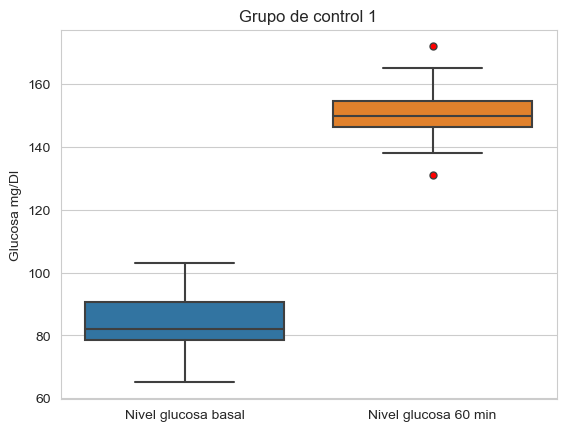

In [11]:
import seaborn as sns

# Excluir la primera columna del grupo 
datos_grupo1 = grupo1.loc[:, grupo1.columns!='Grupo de control']
flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
fig = plt.figure()
sns.set_style("whitegrid")
ax = fig.add_subplot(111)
ax.set_title('Grupo de control 1')
ax.set_ylabel('Glucosa mg/Dl')

# Visualizacion del boxplot
sns.boxplot(flierprops=flierprops,width=0.8,data=datos_grupo1);

En el primer *boxplot* podemos observar que no hay presencia de valores atípicos, es decir valores que estén por fuera de 1,5 veces por encima o por debajo del rango intercuartilico.

En el segundo *boxplot* sí observamos la presencia de *outliers*. Para calcularlos realizamos:

In [12]:
upper_bound = q3_ng60_1+(1.5*ric_ng60_1)
lower_bound = q1_ng60_1-(1.5*ric_ng60_1)
print(f'El bigote superior del boxplot es igual a: {upper_bound}, y el bigote inferior del boxplot: {lower_bound}')

El bigote superior del boxplot es igual a: 166.0, y el bigote inferior del boxplot: 134.0


In [13]:
outliers = []
for i in ng60_1:
    if i > upper_bound:
        outliers.append(i)
    elif i < lower_bound:
        outliers.append(i)

outliers

[172, 131]

Según el boxplot del nivel de glucosa a los 60 minutos de la ingesta para el grupo 1, encontramos que **172 y 131** son valores atípicos o *outliers*.

**d) Normalidad de los datos del nivel de glucosa a los 60 min de la ingesta de glucosa, para ambos grupos de control.**

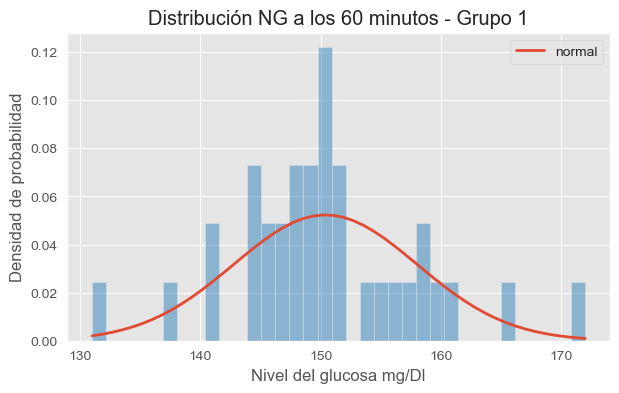

In [43]:
from scipy import stats

# curva de la normal
mu, sigma = stats.norm.fit(ng60_1)
x_hat = np.linspace(min(ng60_1), max(ng60_1))
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=ng60_1, density=True, bins=35, color="#3182bd", alpha=0.5)
ax.set_title('Distribución NG a los 60 minutos - Grupo 1')
ax.set_xlabel('Nivel del glucosa mg/Dl')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

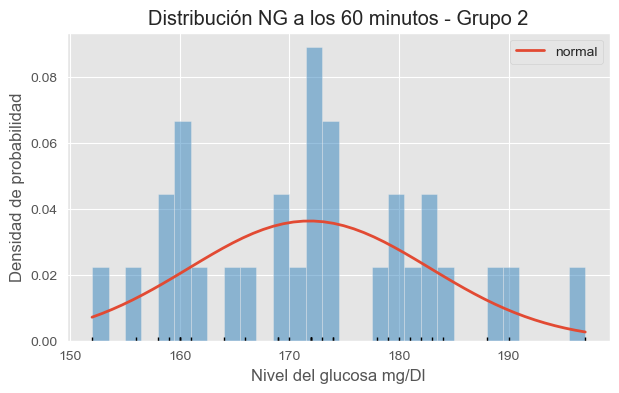

In [44]:
ng60_2 = grupo2['Nivel glucosa 60 min']

# curva de la normal
mean_ng60_2 = ng60_2.mean()
mu2 = mean_ng60_2
std_ng60_2 = ng60_2.std()
sigma2 = std_ng60_2
x_hat2 = np.linspace(min(ng60_2), max(ng60_2))
y_hat2 = stats.norm.pdf(x_hat2, mu2, sigma2)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat2, y_hat2, linewidth=2, label='normal')
ax.hist(x=ng60_2, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(ng60_2, np.full_like(ng60_2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución NG a los 60 minutos - Grupo 2')
ax.set_xlabel('Nivel del glucosa mg/Dl')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

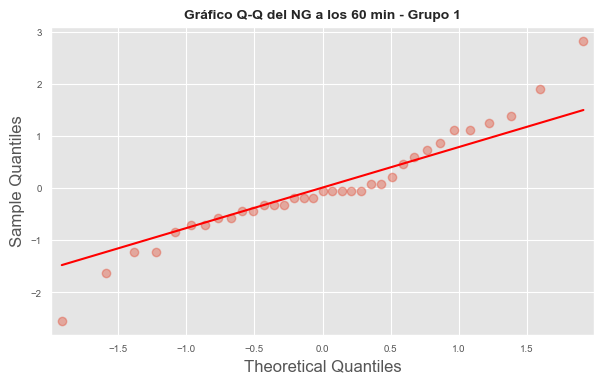

In [16]:
# Configuración matplotlib
plt.style.use('ggplot')

# Q-Q Plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    ng60_1,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del NG a los 60 min - Grupo 1', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

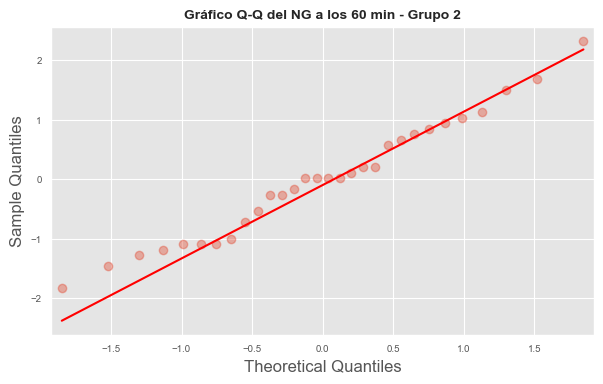

In [17]:
# Q-Q Plot
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    ng60_2,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del NG a los 60 min - Grupo 2', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Podemos observar también de manera gráfica (Q-Q plot) que los cuartiles se asemejan bastante a los cuartiles normales.

In [18]:
# Shapiro-Wilk test grupo 1
shapiro_test = stats.shapiro(ng60_1)
shapiro_test

ShapiroResult(statistic=0.9626076817512512, pvalue=0.2734089195728302)

In [19]:
# Shapiro-Wilk test grupo 2
shapiro_test = stats.shapiro(ng60_2)
shapiro_test

ShapiroResult(statistic=0.9776138663291931, pvalue=0.7591866254806519)

Por los resultados obtenidos del *p-valor* del test Shapiro-Wilk, para el nivel de glucosa a los 60 minutos de ambos grupos, ninguno de los tests muestra evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal.

In [20]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(ng60_1)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 3.6141410458414556, p-value = 0.16413426075809492


In [21]:
# D'Agostino's K-squared test
k2, p_value = stats.normaltest(ng60_2)
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 0.5378866941075515, p-value = 0.7641865478412724


## Ejercicio 2

**a) Estudio de la relación lineal entre las dos variables para el grupo de control 1.**

In [22]:
# Cálculo de correlación con Pandas
print('Correlación Pearson: ', ngb1.corr(ng60_1, method='pearson'))

Correlación Pearson:  0.796405256684113


Según el coeficiente de correlación de Pearson obtenido (0,79) podemos observar una asociación alta entre ambas variables, indicando que un aumento en el nivel de glucosa basal genera una variación positiva en el nivel de glucosa a los 60 minutos para pacientes jóvenes (grupo de control 1). 

**b) Modelo de regresión lineal**

In [23]:
import statsmodels.api as sm

x = sm.add_constant(ngb1)
y = ng60_1
modelo = sm.OLS(y, x).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Nivel glucosa 60 min   R-squared:                       0.634
Model:                              OLS   Adj. R-squared:                  0.623
Method:                   Least Squares   F-statistic:                     57.23
Date:                  Tue, 24 Jan 2023   Prob (F-statistic):           1.06e-08
Time:                          19:08:00   Log-Likelihood:                -103.17
No. Observations:                    35   AIC:                             210.3
Df Residuals:                        33   BIC:                             213.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  91.3837      7.843     11.652      0.000      75.428     107.339
Nivel glucosa basal     0.6969      0.092      7.565      0.000       0.509       0.884
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.175
Skew:                           0.433   Prob(JB):                        0.556
Kurtosis:                       2.765   Cond. No.                         832.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
from sklearn.linear_model import LinearRegression

x = ngb1.values.reshape(-1, 1)
y = ng60_1.values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

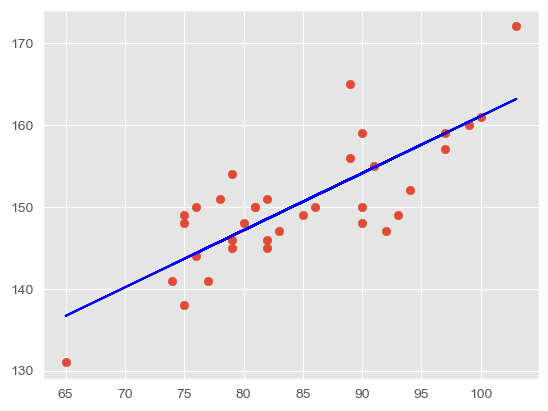

In [25]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='blue')
plt.show()

Obtenemos el modelo para el grupo de control 1:

$β_0 = 91,3837$

$β_1 = 0,6969$

$Nivel glucosa 60 min = 91,3837 + Nivel glucosa basal * 0,6969$

In [26]:
# obtenemos el f(83)
f_83 = 91.3837 + 83 * 0.6969
f_83

149.2264

Según nuestro modelo de regresión lineal podemos **estimar** que para un paciente cuyo nivel de glucosa basal es de **83 mg/Dl**, a los _60 minutos_ tendrá unos **149,2264 mg/Dl**.

**c) Porcentaje no explicado por el modelo de regresión lineal del nivel de glucosa a la hora de la ingesta:**

In [27]:
r2 = linear_regressor.score(x,y)
print('Coeficiente r2: ',r2)

Coeficiente r2:  0.634261332874088


Una vez conocido el coeficiente de determinación $r^2$, en este caso $r^2$ = 63,43% , podemos decir que hay un 36,57% no explicado por el modelo anterior del nivel de glucosa pasados 60 minutos.

**d) Aumento del nivel de glucosa basal en 5mg/Dl y su variación a los 60 minutos.**

In [28]:
beta_1 = 0.6969

El valor de $β_1 = 0,6969$ nos indica que por cada unidad que aumenta el nivel de glucosa basal, aumenta 0,6969 grados el nivel de glucosa basal a los 60 minutos.

In [29]:
print('Variación del nivel de glucosa basal por 5 mg/Dl: ',beta_1 * 5)

Variación del nivel de glucosa basal por 5 mg/Dl:  3.4844999999999997


De acuerdo a los coeficientes obtenidos del modelo podemos estimar que por cada **5 mg/Dl** de aumento en el nivel de glucosa basal de un paciente, a los _60 minutos_ aumentaría un **3,4845 mg/Dl.**

## Ejercicio 3

**a) Estudio del nivel de glucosa basal medio en los jóvenes como 88 mg/Dl con intervalos de confianza del 95% y 99%.**

In [30]:
stats.t.interval(confidence=0.95,df=len(ngb1)-1,loc=mean_ngb1,scale=stats.sem(ngb1))

(81.64758693301904, 87.72384163840952)

In [31]:
stats.t.interval(confidence=0.99,df=len(ngb1)-1,loc=mean_ngb1,scale=stats.sem(ngb1))

(80.60686967940265, 88.76455889202592)

Con los resultados obtenidos **no podemos admitir** que el nivel de glucosa basal media para los jóvenes sea de 88 mg/Dl con un intervalo de confianza del **95%** pero **sí podemos hacerlo** para un intervalo de confianza del **99%**.

**b) Estudio de diferencia de medias del nivel de glucosa basal para ambos grupos de control, con intervalos de confianza del 95% y 99%.**

Utilizamos el test *t de Student* para analizar el comportamiento de las medias de dos muestras **independientes.**

Primero debemos comprobar la **normalidad** de las poblaciones, para ello utilizamos el test de Shapiro-Wilk:

In [50]:
# Test de normalidad Shapiro-Wilk
stats.shapiro(ngb1)

ShapiroResult(statistic=0.9678662419319153, pvalue=0.38737523555755615)

In [49]:
# Test de normalidad Shapiro-Wilk
stats.shapiro(ngb2)

ShapiroResult(statistic=0.9675338268280029, pvalue=0.474089115858078)

Con el test de Shapiro-Wilk no encontramos evidencia significativa de que los datos no proceden de poblaciones con distribución normal (al ser el *p-valor* superior al 5% de significancia).

In [53]:
# Test de homocedasticidad
stats.bartlett(ngb1, ngb2)

BartlettResult(statistic=1.0443714849182046, pvalue=0.30680695516519924)

Por el test de homegeneidad de varianzas de Bartlett, no se encuentran evidencias significativas (para $\alpha$ = 5%) de que las varianzas sean distintas entre ambas poblaciones y podemos realizar el *t-test*.

In [47]:
import pingouin as pg
pg.ttest(x=ngb1, y=ngb2, alternative='two-sided', correction=False, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.31379,63,two-sided,0.023954,"[-8.79, -0.64]",0.575686,2.35,0.624939


Como el intervalo de confianza al 95% obtenido no presenta el valor cero, **no podemos aceptar** la $H_0: \hat{x_1} = \hat{x_2}$.

In [45]:
pg.ttest(x=ngb1, y=ngb2, alternative='two-sided', correction=False, confidence=0.99)

,T,dof,alternative,p-val,CI99%,cohen-d,BF10,power
T-test,-2.31379,63,two-sided,0.023954,"[-10.12610989442638, 0.6975384658549327]",0.575686,2.35,0.624939


Para el intervalo de confianza al 99%, **no podemos rechazar** la hipótesis nula al estar comprendido el cero dentro del intervalo.

**c) Estudio de la proporción de la población con un nivel de glucosa basal superior a 95 mg/Dl con intervalo de confianza del 98%. 
Hipotesis proporción de la población NG > 95 mg/Dl = 0.15 con nivel de significación del 5%.**

Calculamos el intervalo de confianza para la proporción poblacional, para el nivel de glucosa basal > 95 mg/Dl, con un confianza del 98%.

$$IC(p) = \hat{p} ± [z_{a/2} \frac{\sqrt{\hat{p} (1-\hat{p})}}{\sqrt{n}}] $$

In [37]:
from statsmodels.stats.proportion import proportion_confint   

n_glucosa_alta = len(df[df['Nivel glucosa basal'] > 95]['Nivel glucosa basal'])
IC98 = proportion_confint(count=n_glucosa_alta, nobs= (len(ngb1) + len(ngb2)), alpha=(1 - 0.98))
print('El intervalo de confianza para la proporción poblacional con nivel de glucosa mayor a 95 mg/Dl es igual a:\n', IC98 )

El intervalo de confianza para la proporción poblacional con nivel de glucosa mayor a 95 mg/Dl es igual a:
 (0.06103809745101678, 0.2774234410105217)


Ahora consideramos el siguiente contraste de hipótesis:
$$H_0: \hat{p} = 0.15$$
$$H_1: \hat{p} ≠ 0.15$$

In [38]:
IC95 = proportion_confint(count=n_glucosa_alta, nobs= (len(ngb1) + len(ngb2)), alpha=(1 - 0.95))
print('Para el 95% de confianza, el intervalo de proporción poblacional obtenido es:\n', IC95)

Para el 95% de confianza, el intervalo de proporción poblacional obtenido es:
 (0.07807770375602453, 0.26038383470551396)


Como podemos observar la proporción de la $H_0$ se encuentra dentro de los valores con un nivel de significancia del 5%, por lo tanto **no podemos rechazar** la hipótesis nula planteada.

**d) VOLUNTARIO. Contraste de muestras emparejadas.**

Esta vez utilizamos el test *t de Student* para analizar el comportamiento de las medias de dos muestras **dependientes/emparejadas.**

Primero debemos comprobar la **normalidad** de las poblaciones, para ello utilizamos el test de Shapiro-Wilk:

In [56]:
# Test de normalidad Shapiro-Wilk
stats.shapiro(ngb2)

ShapiroResult(statistic=0.9678662419319153, pvalue=0.38737523555755615)

In [60]:
# Test de normalidad Shapiro-Wilk
ng60_2 = grupo2['Nivel glucosa 60 min']
stats.shapiro(ng60_2)

ShapiroResult(statistic=0.9776138663291931, pvalue=0.7591866254806519)

Con el test de Shapiro-Wilk no encontramos evidencia significativa de que los datos no proceden de poblaciones con distribución normal (al ser el *p-valor* superior al 5% de significancia).

No es necesario que las varianzas de ambos grupos sean iguales (homocedasticidad no necesaria). Por ello realizamos el *t-test* de muestras emparejadas:

**Hipótesis:**

$H_0:$ no hay variación significativa del nivel de glucosa en sangre en el grupo de control 2, después de la ingesta de glucosa.

$H_1:$ si hay diferencia significativa del nivel de glucosa en sangre en el grupo de control 2, después de la ingesta de glucosa.

In [41]:
# Test t para datos dependientes (p-valor, intervalos de confianza)
pg.ttest(y=ngb2, x=ng60_2, alternative='two-sided', paired=True, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,34.374099,29,two-sided,4.712941e-25,"[77.53, 87.34]",8.817389,5.454e+21,1.0


**Conclusión**

El *p-valor* obtenido por el t-test emparejado es menor al nivel de significancia establecido ( $\alpha=0.05$ ), por lo que podemos rechazar la hipótesis nula y acepta la hipótesis alternativa. Podemos considerar que **si hay** una variación significativa del nivel de glucosa antes y después de la ingesta.